In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import pickle

import matplotlib.style as style

# style.use('tableau-colorblind10')

nothing here
nothing here
nothing here
nothing here


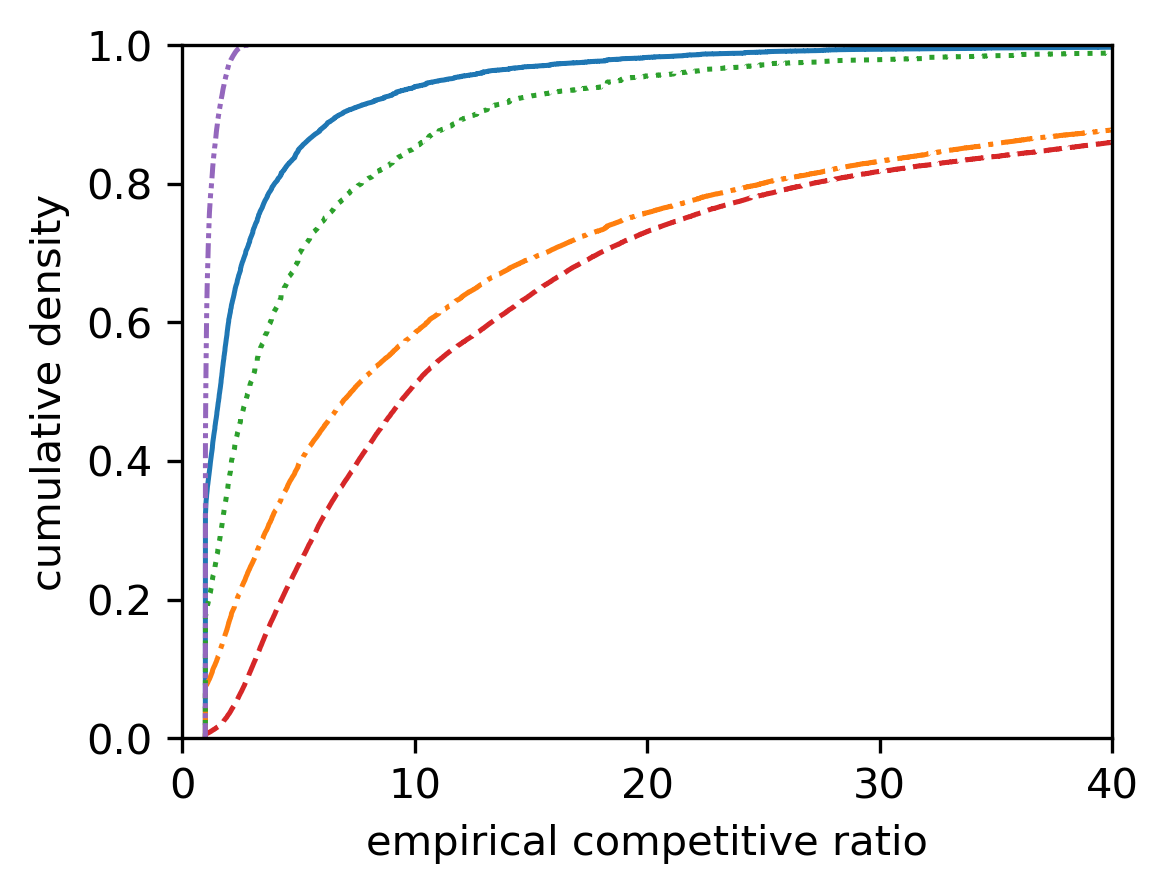

In [2]:
# style.use('seaborn-v0_8-paper')
######################### plotting CDF

ds = np.arange(5, 17, 2)
betas = np.arange(0, 100, 10)
results = {}
for d in ds:
    for beta in betas:
        try:
            with open("CDF/cdf_results_d{}_s{}.pickle".format(int(d), int(beta)), "rb") as f:
                result = pickle.load(f)
                results[(d, beta)] = result
        except:
            print("nothing here")

# compute the competitive ratios for each setting of d and beta
roros = np.array([])
lazys = np.array([])
agnostics = np.array([])
constThresholds = np.array([])
minimizers = np.array([])
clip2s = np.array([])
for key in results.keys():
    cost_opts = results[key]["cost_opts"]
    cost_roros = results[key]["cost_roros"]
    cost_lazys = results[key]["cost_lazys"]
    cost_agnostics = results[key]["cost_agnostics"]
    cost_constThresholds = results[key]["cost_constThresholds"]
    cost_minimizers = results[key]["cost_minimizers"]
    cost_clip2s = results[key]["cost_clip2s"]
    cost_baseline2s = results[key]["cost_baseline2s"]

    roros = np.append(roros, (np.array(cost_roros) / np.array(cost_opts)))
    lazys = np.append(lazys, (np.array(cost_lazys) / np.array(cost_opts)))
    agnostics = np.append(agnostics, (np.array(cost_agnostics) / np.array(cost_opts)))
    constThresholds = np.append(constThresholds, (np.array(cost_constThresholds) / np.array(cost_opts)))
    minimizers = np.append(minimizers, (np.array(cost_minimizers) / np.array(cost_opts)))
    clip2s = np.append(clip2s, (np.array(cost_clip2s) / np.array(cost_opts)))

# plot the cdf of the competitive ratio 
plt.figure(figsize=(4, 3), dpi=300)
lw = 1.2
sns.ecdfplot(data = roros, stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
# sns.ecdfplot(data = lazys, stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = agnostics, stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = constThresholds, stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
sns.ecdfplot(data = minimizers, stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
sns.ecdfplot(data = clip2s, stat='proportion', linestyle=(0, (3, 1, 1, 1, 1, 1)), markersize=6, linewidth=lw)
plt.ylabel("cumulative density")
plt.xlabel("empirical competitive ratio")
plt.xlim(0, 40)
plt.savefig("plots/cdf.pdf", bbox_inches='tight')

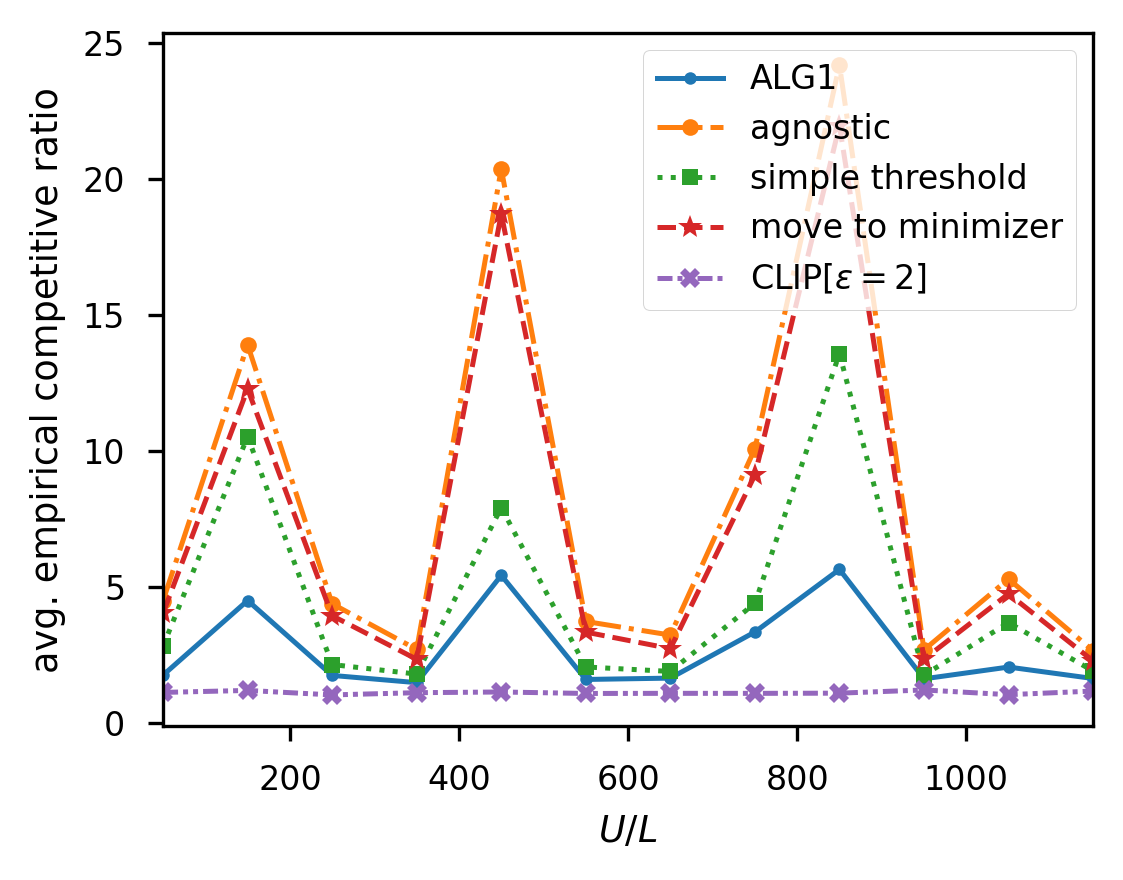

In [4]:
######################### plotting U/L data

# load results from pickle file
Us = list(np.arange(50, 1350, 100))
results = {}
for U in Us:
    with open("UL/ul_results_t{}.pickle".format(int(U)), "rb") as f:
        result = pickle.load(f)
        results[U] = result

# compute average competitive ratio for each setting of UL
roros = []
lazys = []
agnostics = []
constThresholds = []
minimizers = []
clip2s = []
baseline2s = []
for U in Us:
    cost_opts = results[U]["cost_opts"]
    cost_roros = results[U]["cost_roros"]
    cost_lazys = results[U]["cost_lazys"]
    cost_agnostics = results[U]["cost_agnostics"]
    cost_constThresholds = results[U]["cost_constThresholds"]
    cost_minimizers = results[U]["cost_minimizers"]
    cost_clip2s = results[U]["cost_clip2s"]
    cost_baseline2s = results[U]["cost_baseline2s"]

    crRORO = (np.array(cost_roros) / np.array(cost_opts)).mean()
    crLazy = (np.array(cost_lazys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crMinimizer = (np.array(cost_minimizers) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()
    crBaseline2 = (np.array(cost_baseline2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    if crClip2 < 1:
        crClip2 = 1

    roros.append(crRORO)
    lazys.append(crLazy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    minimizers.append(crMinimizer)
    clip2s.append(crClip2)
    baseline2s.append(crBaseline2)

# plot the average competitive ratio 
plt.figure(figsize=(4, 3), dpi=300)
lw = 1.2
plt.plot(Us, roros, label="ALG1", marker='.', linestyle='solid', markersize=6, linewidth=lw)
# plt.plot(Us, lazys, label="lazy agnostic", marker='D', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(Us, agnostics, label="agnostic", marker='o', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(Us, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=4, linewidth=lw)
plt.plot(Us, minimizers, label="move to minimizer", marker='*', linestyle='dashed', markersize=6, linewidth=lw)
plt.plot(Us, clip2s, label="CLIP[$\\epsilon = 2$]", marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)), markersize=5, linewidth=lw)
plt.xlim(50, 1150)
plt.legend()
plt.xlabel("$U/L$")
plt.ylabel("avg. empirical competitive ratio")
plt.savefig("plots/ul.pdf", bbox_inches='tight')



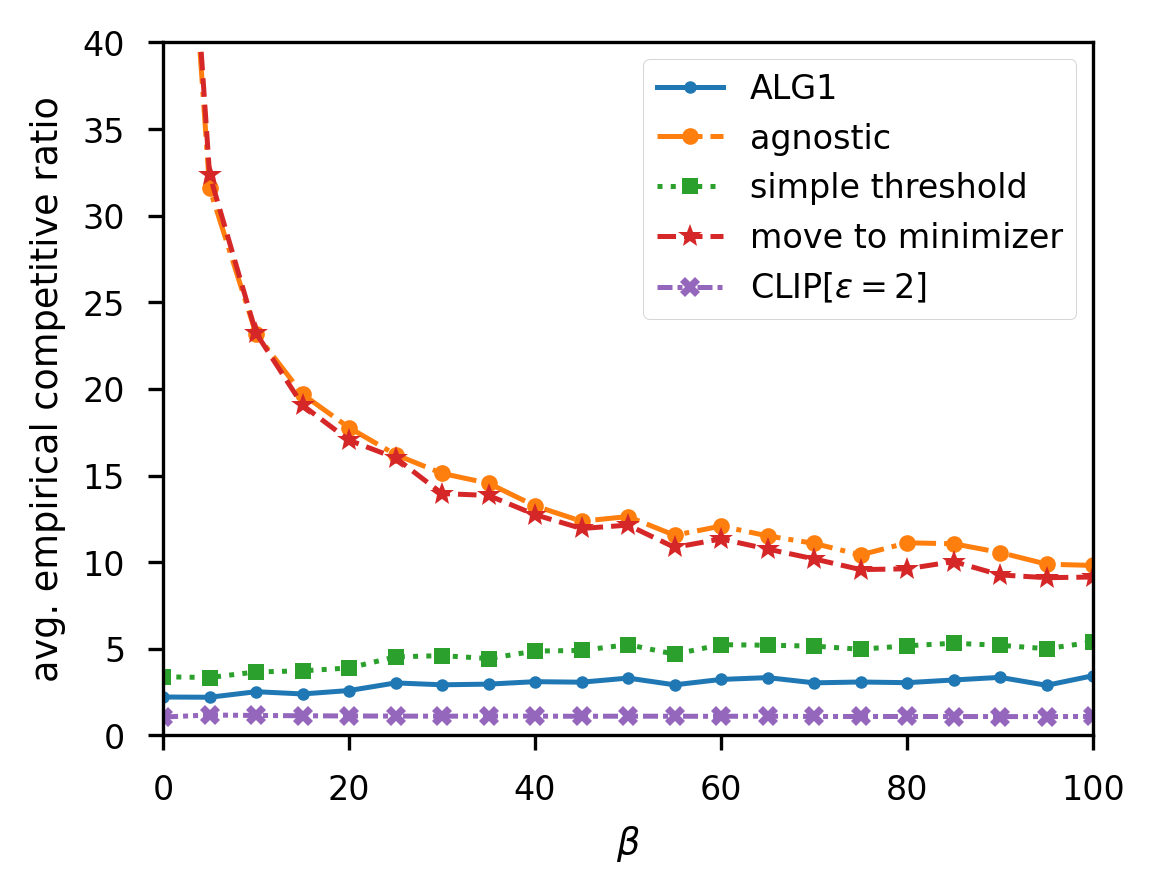

In [9]:
######################### plotting beta data

# load results from pickle file
betas = list(np.arange(0, 105, 5))
results = {}
for beta in betas:
    with open("beta/beta_results_s{}.pickle".format(int(beta)), "rb") as f:
        result = pickle.load(f)
        results[beta] = result

# compute average competitive ratio for each setting of UL
roros = []
lazys = []
agnostics = []
constThresholds = []
minimizers = []
clip2s = []
baseline2s = []
for beta in betas:
    cost_opts = results[beta]["cost_opts"]
    cost_roros = results[beta]["cost_roros"]
    cost_lazys = results[beta]["cost_lazys"]
    cost_agnostics = results[beta]["cost_agnostics"]
    cost_constThresholds = results[beta]["cost_constThresholds"]
    cost_minimizers = results[beta]["cost_minimizers"]
    cost_clip2s = results[beta]["cost_clip2s"]
    cost_baseline2s = results[beta]["cost_baseline2s"]

    crRORO = (np.array(cost_roros) / np.array(cost_opts)).mean()
    crLazy = (np.array(cost_lazys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crMinimizer = (np.array(cost_minimizers) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()
    crBaseline2 = (np.array(cost_baseline2s) / np.array(cost_opts)).mean()

    roros.append(crRORO)
    lazys.append(crLazy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    minimizers.append(crMinimizer)
    clip2s.append(crClip2)
    baseline2s.append(crBaseline2)

# plot the average competitive ratio 
plt.figure(figsize=(4, 3), dpi=300)
lw = 1.2
plt.plot(betas, roros, label="ALG1", marker='.', linestyle='solid', markersize=6, linewidth=lw)
# plt.plot(betas, lazys, label="lazy agnostic", marker='D', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(betas, agnostics, label="agnostic", marker='o', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(betas, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=4, linewidth=lw)
plt.plot(betas, minimizers, label="move to minimizer", marker='*', linestyle='dashed', markersize=6, linewidth=lw)
plt.plot(betas, clip2s, label="CLIP[$\\epsilon = 2$]", marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)), markersize=5, linewidth=lw)
plt.xlim(0, 100)
plt.ylim(0, 40)
plt.legend()
plt.xlabel("$\\beta$")
plt.ylabel("avg. empirical competitive ratio")
plt.savefig("plots/beta.pdf", bbox_inches='tight')


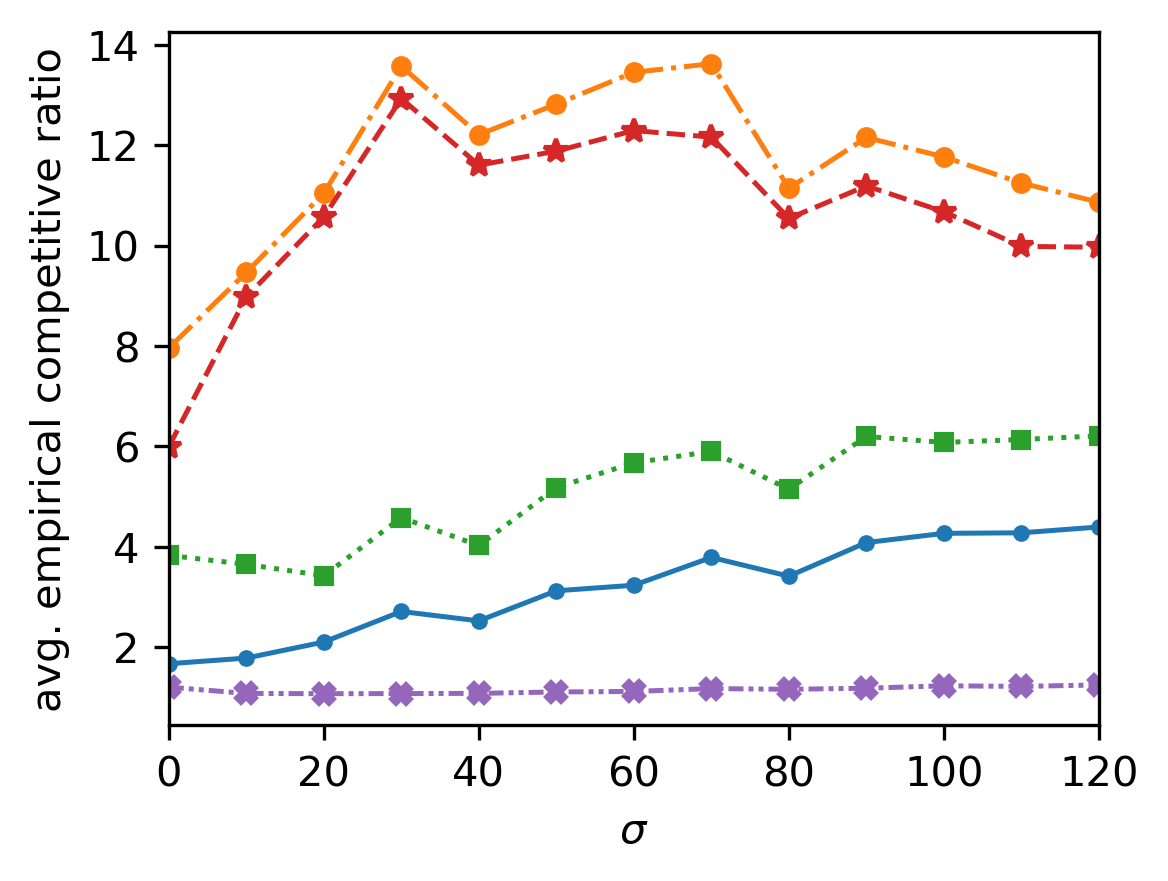

In [4]:
######################### plotting var data

# load results from pickle file
vars = list(np.arange(0, 125, 10))
results = {}
for var in vars:
    with open("var/var_results_{}.pickle".format(int(var)), "rb") as f:
        result = pickle.load(f)
        results[var] = result

# compute average competitive ratio for each setting of UL
roros = []
lazys = []
agnostics = []
constThresholds = []
minimizers = []
clip2s = []
baseline2s = []
for var in vars:
    cost_opts = results[var]["cost_opts"]
    cost_roros = results[var]["cost_roros"]
    cost_lazys = results[var]["cost_lazys"]
    cost_agnostics = results[var]["cost_agnostics"]
    cost_constThresholds = results[var]["cost_constThresholds"]
    cost_minimizers = results[var]["cost_minimizers"]
    cost_clip2s = results[var]["cost_clip2s"]
    cost_baseline2s = results[var]["cost_baseline2s"]

    crRORO = (np.array(cost_roros) / np.array(cost_opts)).mean()
    crLazy = (np.array(cost_lazys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crMinimizer = (np.array(cost_minimizers) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()
    crBaseline2 = (np.array(cost_baseline2s) / np.array(cost_opts)).mean()

    roros.append(crRORO)
    lazys.append(crLazy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    minimizers.append(crMinimizer)
    clip2s.append(crClip2)
    baseline2s.append(crBaseline2)

# plot the average competitive ratio 
plt.figure(figsize=(4, 3), dpi=300)
lw = 1.2
plt.plot(vars, roros, label="ALG1", marker='.', linestyle='solid', markersize=6, linewidth=lw)
# plt.plot(vars, lazys, label="lazy agnostic", marker='D', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(vars, agnostics, label="agnostic", marker='o', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(vars, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=4, linewidth=lw)
plt.plot(vars, minimizers, label="move to minimizer", marker='*', linestyle='dashed', markersize=6, linewidth=lw)
plt.plot(vars, clip2s, label="CLIP[$\\epsilon = 2$]", marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)), markersize=5, linewidth=lw)
plt.xlim(0, 120)
plt.xlabel("$\\sigma$")
plt.ylabel("avg. empirical competitive ratio")
plt.savefig("plots/var.pdf", bbox_inches='tight')

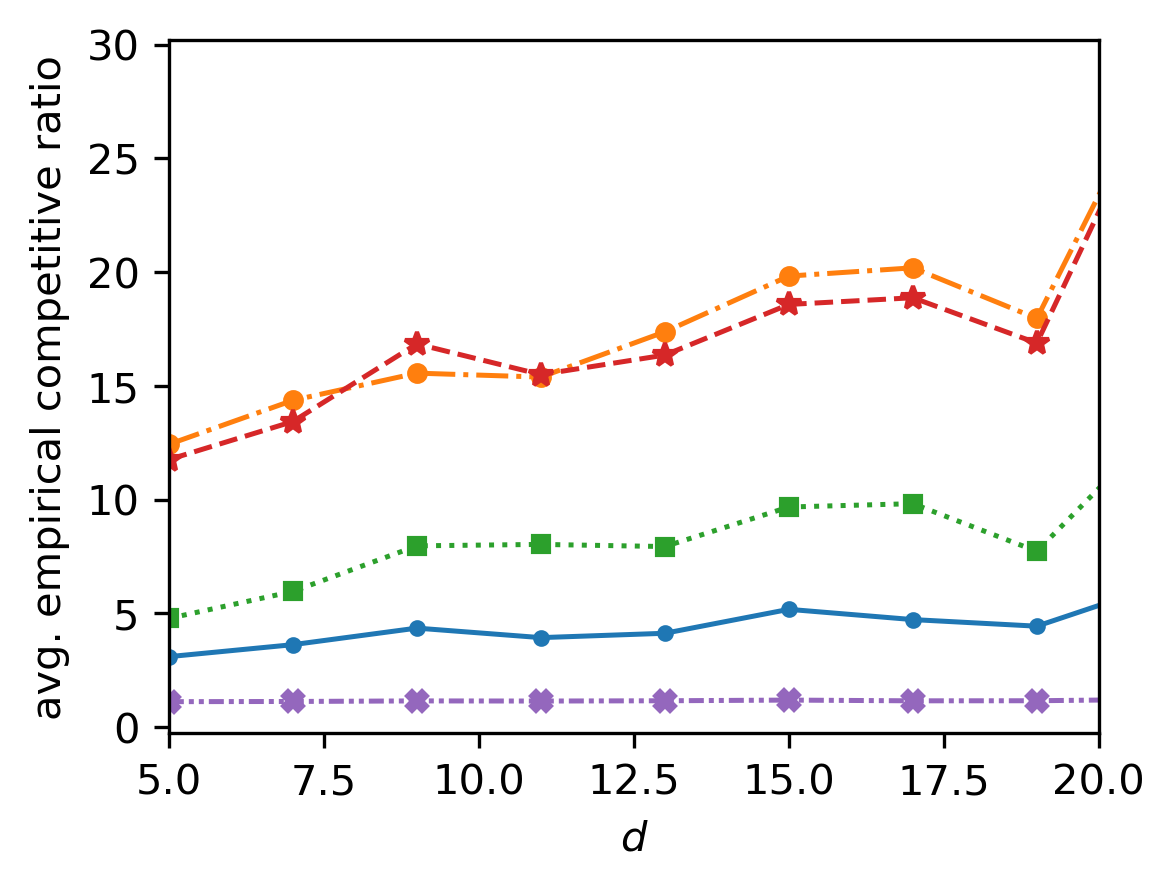

In [6]:
######################### plotting dim data

# load results from pickle file
dims = list(np.arange(5, 22, 2))
results = {}
for d in dims:
    with open("dim/dim_results_d{}.pickle".format(int(d)), "rb") as f:
        result = pickle.load(f)
        results[d] = result

# compute average competitive ratio for each setting of UL
roros = []
lazys = []
agnostics = []
constThresholds = []
minimizers = []
clip2s = []
for d in dims:
    cost_opts = results[d]["cost_opts"]
    cost_roros = results[d]["cost_roros"]
    cost_lazys = results[d]["cost_lazys"]
    cost_agnostics = results[d]["cost_agnostics"]
    cost_constThresholds = results[d]["cost_constThresholds"]
    cost_minimizers = results[d]["cost_minimizers"]
    cost_clip2s = results[d]["cost_clip2s"]

    crRORO = (np.array(cost_roros) / np.array(cost_opts)).mean()
    crLazy = (np.array(cost_lazys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crMinimizer = (np.array(cost_minimizers) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    roros.append(crRORO)
    lazys.append(crLazy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    minimizers.append(crMinimizer)
    clip2s.append(crClip2)

# plot the average competitive ratio 
plt.figure(figsize=(4, 3), dpi=300)
lw = 1.2
plt.plot(dims, roros, label="ALG1", marker='.', linestyle='solid', markersize=6, linewidth=lw)
# plt.plot(dims, lazys, label="lazy agnostic", marker='D', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(dims, agnostics, label="agnostic", marker='o', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(dims, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=4, linewidth=lw)
plt.plot(dims, minimizers, label="move to minimizer", marker='*', linestyle='dashed', markersize=6, linewidth=lw)
plt.plot(dims, clip2s, label="CLIP[$\\epsilon = 2$]", marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)), markersize=5, linewidth=lw)
plt.xlim(5, 20)
plt.xlabel("$d$")
plt.ylabel("avg. empirical competitive ratio")
plt.savefig("plots/dim.pdf", bbox_inches='tight')

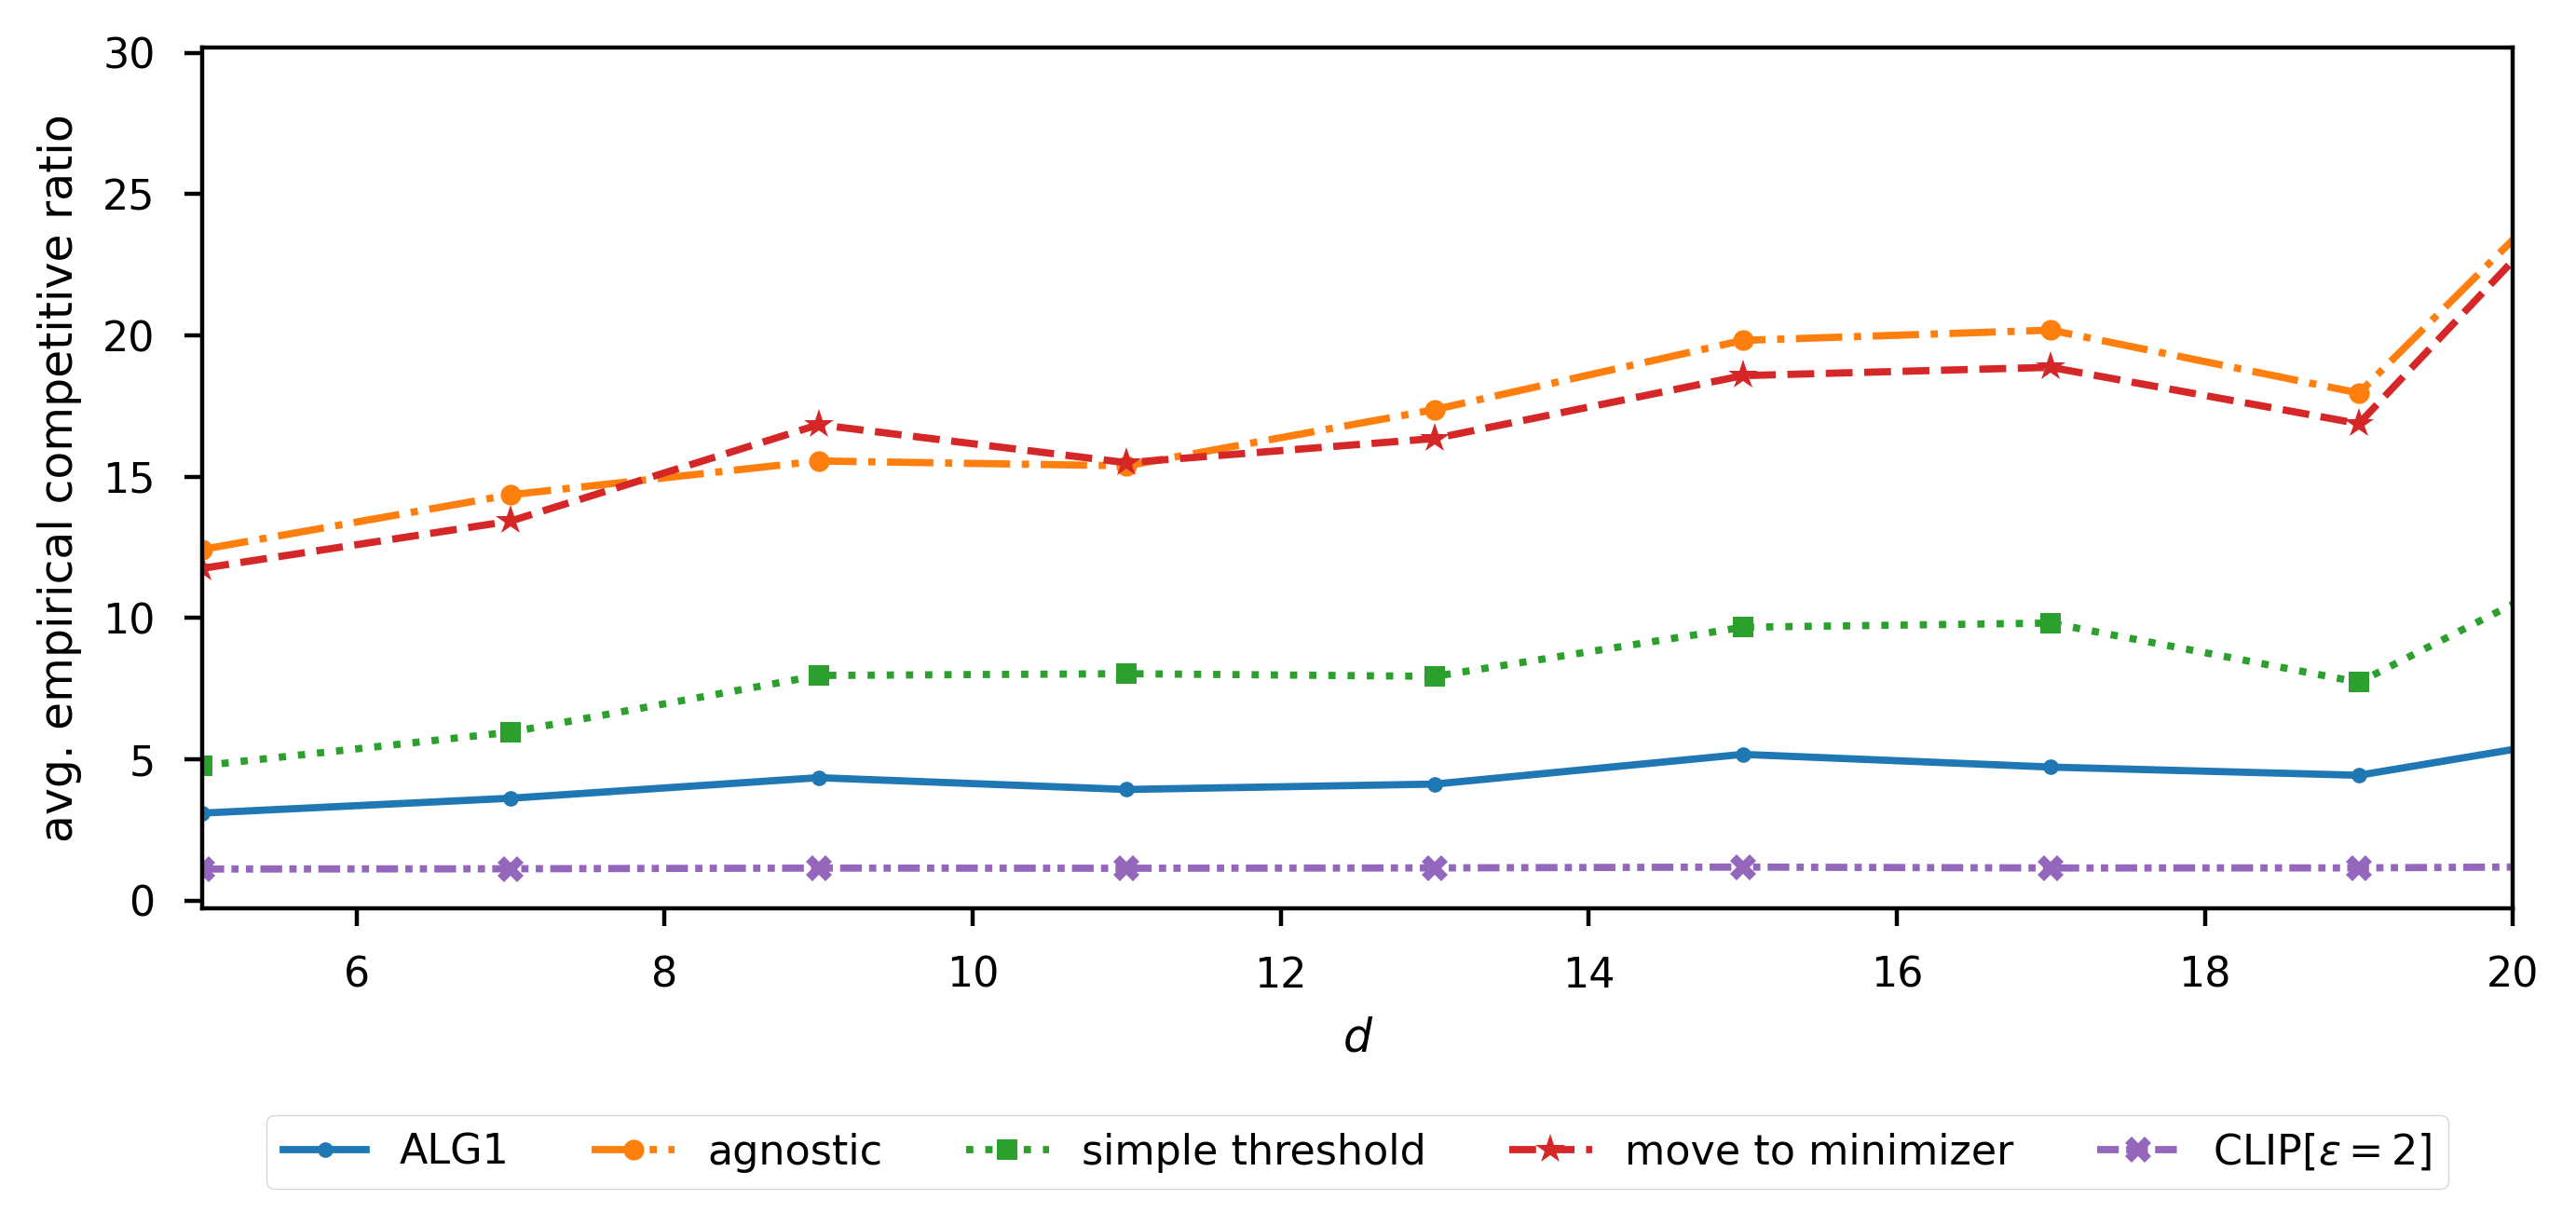

In [9]:
# make a plot with a big legend 
plt.figure(figsize=(8, 3), dpi=400)
plt.plot(dims, roros, label="ALG1", marker='.', linestyle='solid', markersize=6)
# plt.plot(dims, lazys, label="lazy agnostic", marker='D', linestyle='dashdot', markersize=4)
plt.plot(dims, agnostics, label="agnostic", marker='o', linestyle='dashdot', markersize=4)
plt.plot(dims, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=4)
plt.plot(dims, minimizers, label="move to minimizer", marker='*', linestyle='dashed', markersize=6)
plt.plot(dims, clip2s, label="CLIP[$\\epsilon = 2$]", marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)), markersize=5)
plt.xlim(5, 20)
plt.xlabel("$d$")
plt.ylabel("avg. empirical competitive ratio")
# 6 column legend
plt.legend(ncol=6, bbox_to_anchor=(0.5, -0.35), loc='lower center')
plt.savefig("plots/legend.pdf", bbox_inches='tight')

In [2]:
style.use('seaborn-v0_8-paper')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

print('\n'.join(color for color in colors))  

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


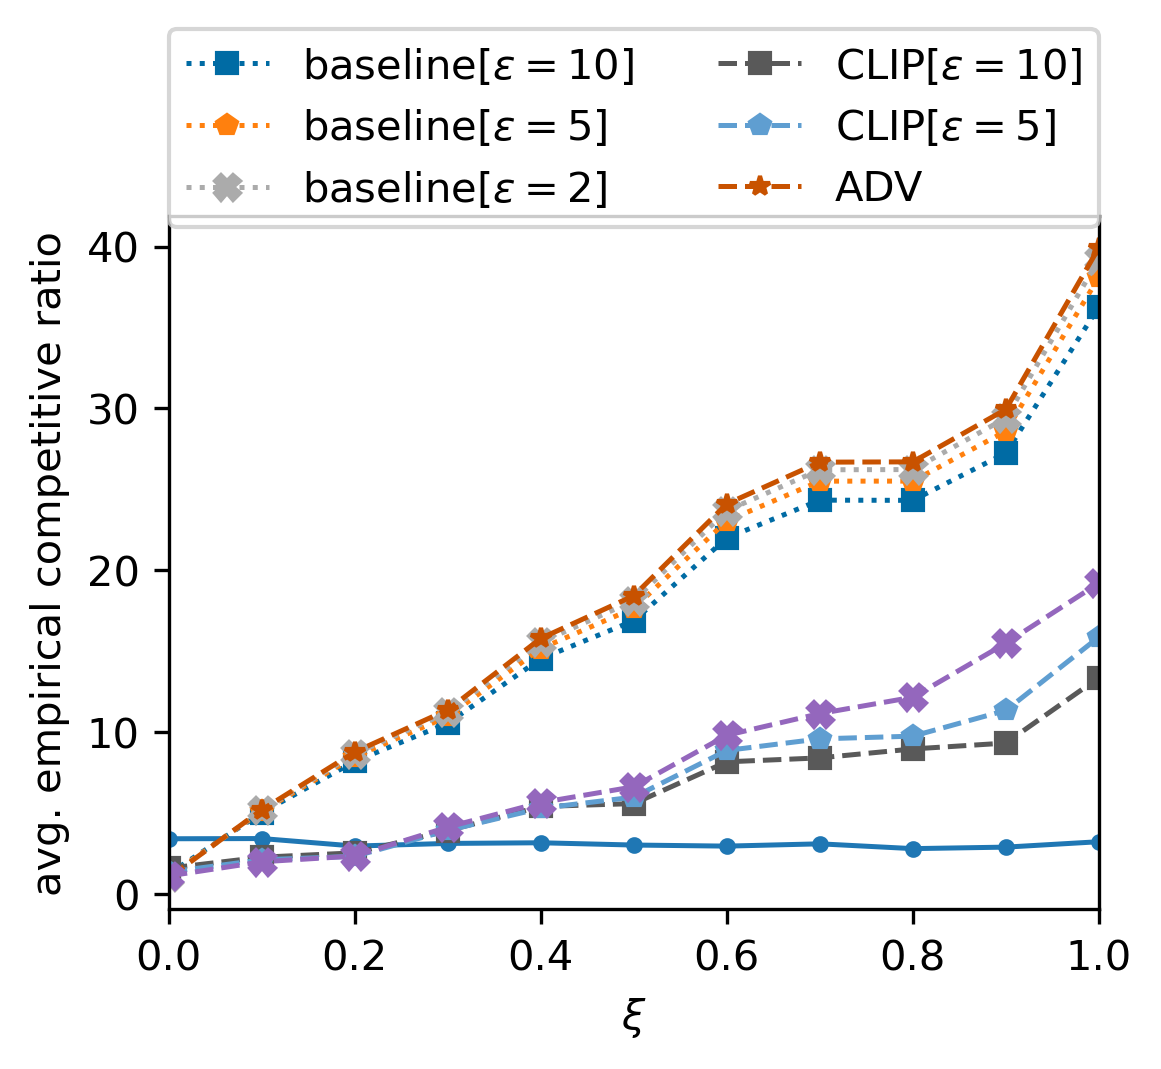

In [5]:
######################### plotting xi data

# style.use('seaborn-v0_8-paper')

# # access colors from the style
# colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

style.use('tableau-colorblind10')

# load results from pickle file
xis = list(np.arange(0, 1.1, 0.1))
results = {}
for xi in xis:
    with open("xi/results_x{}.pickle".format(int(xi*100)), "rb") as f:
        result = pickle.load(f)
        results[xi] = result

# compute average competitive ratio for each setting of UL
roros = []
clip0s = []
clip2s = []
clip5s = []
clip10s = []
baseline2s = []
baseline5s = []
baseline10s = []
for xi in xis:
    cost_opts = results[xi]["cost_opts"]
    cost_roros = results[xi]["cost_roros"]
    cost_clip0s = results[xi]["cost_clip0s"]
    cost_clip2s = results[xi]["cost_clip2s"]
    cost_clip5s = results[xi]["cost_clip5s"]
    cost_clip10s = results[xi]["cost_clip10s"]
    cost_baseline2s = results[xi]["cost_baseline2s"]
    cost_baseline5s = results[xi]["cost_baseline5s"]
    cost_baseline10s = results[xi]["cost_baseline10s"]

    # if U == 550:
    #     cost_opts = results[U]["cost_opts"] / 2 + 1
    #     cost_roros = results[U]["cost_roros"] / 2 + 1
    #     cost_lazys = results[U]["cost_lazys"] / 2 + 1
    #     cost_agnostics = results[U]["cost_agnostics"] / 2 + 1
    #     cost_constThresholds = results[U]["cost_constThresholds"] / 2 + 1
    #     cost_minimizers = results[U]["cost_minimizers"] / 2 + 1
    #     cost_clip2s = results[U]["cost_clip2s"] / 2 + 1
    #     cost_baseline2s = results[U]["cost_baseline2s"] / 2 + 1


    crRORO = (np.array(cost_roros) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()
    crClip5 = (np.array(cost_clip5s) / np.array(cost_opts)).mean()
    crClip10 = (np.array(cost_clip10s) / np.array(cost_opts)).mean()
    crBaseline2 = (np.array(cost_baseline2s) / np.array(cost_opts)).mean()
    crBaseline5 = (np.array(cost_baseline5s) / np.array(cost_opts)).mean()
    crBaseline10 = (np.array(cost_baseline10s) / np.array(cost_opts)).mean()

    roros.append(crRORO)
    clip0s.append(crClip0)
    clip2s.append(crClip2)
    clip5s.append(crClip5)
    clip10s.append(crClip10)
    baseline2s.append(crBaseline2)
    baseline5s.append(crBaseline5)
    baseline10s.append(crBaseline10)

# plot the average competitive ratio 
plt.figure(figsize=(4, 3), dpi=300)
lw = 1.2
plt.plot(xis, roros, marker='.', color='#1f77b4', linestyle='solid', markersize=6, linewidth=lw)
plt.plot(xis, baseline10s, label="baseline[$\\epsilon = 10$]", marker='s', linestyle='dotted', markersize=5, linewidth=lw)
plt.plot(xis, baseline5s, label="baseline[$\\epsilon = 5$]", marker='p', linestyle='dotted', markersize=5, linewidth=lw)
plt.plot(xis, baseline2s, label="baseline[$\\epsilon = 2$]", marker='X', linestyle='dotted', markersize=6, linewidth=lw)
plt.plot(xis, clip10s, label="CLIP[$\\epsilon = 10$]", marker='s', linestyle='dashed', markersize=5, linewidth=lw)
plt.plot(xis, clip5s, label="CLIP[$\\epsilon = 5$]", marker='p', linestyle='dashed', markersize=5, linewidth=lw)
plt.plot(xis, clip0s, label="ADV", marker='*', linestyle='dashed', markersize=5, linewidth=lw)
plt.plot(xis, clip2s, color='#9467bd', marker='X', linestyle='dashed', markersize=6, linewidth=lw)
plt.xlim(0, 1)

# legend in three columns at the top
plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.3), loc='upper center')
plt.xlabel("$\\xi$")
plt.ylabel("avg. empirical competitive ratio")
plt.savefig("plots/xi.pdf", bbox_inches='tight')
